### If the notebook does not fully load, please access it using the NBViewer located at the link below:
https://nbviewer.jupyter.org/github/carkar7/Loan_data_classification_project/blob/master/Classification%20of%20Loan%20Data.ipynb


# Introduction
The following are the results of a project that required the generation of 4 supervised learning models using a dataset consisting of lending club data provided by Kaggle (https://kaggle.com/wendykan/lending-club-loan-data/downloads/lending-club-loan-data.zip).

In [40]:
import numpy as np 
import pandas as pd 

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold  
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline 

### Getting the data and loading it into a pandas DataFrame for clean-up and analysis

In [41]:
loans = pd.read_csv('loan.csv', low_memory = False)

### Setting up pandas environment to clearly view all variables

In [42]:
# set up display area to show dataframe
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
# pd.set_option('display.width', 100)

loans.head(50)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,1077501,1296599,5000.0,5000.0,4975.000000,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.00,Verified,Dec-2011,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-1985,1.0,NaN,NaN,3.0,0.0,13648.0,83.70,9.0,f,0.00,0.00,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.0000,Jan-2015,171.62,NaN,Jan-2016,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1077430,1314167,2500.0,2500.0,2500.000000,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.00,Source Verified,Dec-2011,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0.0,Apr-1999,5.0,NaN,NaN,3.0,0.0,1687.0,9.40,4.0,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.1100,Apr-2013,119.66,NaN,Sep-2013,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1077175,1313524,2400.0,2400.0,2400.000000,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.00,Not Verified,Dec-2011,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,NaN,small_business,real estate business,606xx,IL,8.72,0.0,Nov-2001,2.0,NaN,NaN,2.0,0.0,2956.0,98.50,10.0,f,0.00,0.00,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.0000,Jun-2014,649.91,NaN,Jan-2016,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1076863,1277178,10000.0,10000.0,10000.000000,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.00,Source Verified,Dec-2011,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0.0,Feb-1996,1.0,35.0,NaN,10.0,0.0,5598.0,21.00,37.0,f,0.00,0.00,12226.302212,12226.30,10000.00,2209.33,16.97,0.00,0.0000,Jan-2015,357.48,NaN,Jan-2015,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1075358,1311748,3000.0,3000.0,3000.000000,60 months,12.69,67.79,B,B5,University Medical Group,1 year,RENT,80000.00,Source Verified,Dec-2011,Current,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0.0,Jan-1996,0.0,38.0,NaN,15.0,0.0,27783.0,53.90,38.0,f,766.90,766.90,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.0000,Jan-2016,67.79,Feb-2016,Jan-2016,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,1075269,1311441,5000.0,5000.0,5000.000000,36 months,7.90,156.46,A,A4,Veolia Transportaton,3 years,RENT,36000.00,Source Verified,Dec-2011,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,NaN,wedding,My wedding loan I promise to pay back,852xx,AZ,11.20,0.0,Nov-2004,3.0,NaN,NaN,9.0,0.0,7963.0,28.30,12.0,f,0.00,0.00,5631.377753,5631.38,5000.00,631.38,0.00,0.00,0.0000,Jan-2015,161.03,NaN,Sep-2015,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.

### Creating a filter containing only those variable names specified in the assignment

In [43]:
cols = ["dti","annual_inc","delinq_2yrs","inq_last_6mths","open_acc","pub_rec",
                             "revol_bal","revol_util","total_acc","out_prncp","out_prncp_inv","total_pymnt",
                             "total_pymnt_inv","total_rec_prncp","total_rec_int","total_rec_late_fee","recoveries",
                             "collection_recovery_fee","last_pymnt_amnt","collections_12_mths_ex_med","loan_status",
                             "purpose","home_ownership","grade","emp_length","term","addr_state","verification_status",
                             "application_type"]

### Filtering the dataset

In [44]:
loans_filtered = loans[cols]

In [45]:
loans_filtered.head(50)

,dti,annual_inc,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,loan_status,purpose,home_ownership,grade,emp_length,term,addr_state,verification_status,application_type
0,27.65,24000.00,0.0,1.0,3.0,0.0,13648.0,83.70,9.0,0.00,0.00,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.0000,171.62,0.0,Fully Paid,credit_card,RENT,B,10+ years,36 months,AZ,Verified,INDIVIDUAL
1,1.00,30000.00,0.0,5.0,3.0,0.0,1687.0,9.40,4.0,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.1100,119.66,0.0,Charged Off,car,RENT,C,< 1 year,60 months,GA,Source Verified,INDIVIDUAL
2,8.72,12252.00,0.0,2.0,2.0,0.0,2956.0,98.50,10.0,0.00,0.00,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.0000,649.91,0.0,Fully Paid,small_business,RENT,C,10+ years,36 months,IL,Not Verified,INDIVIDUAL
3,20.00,49200.00,0.0,1.0,10.0,0.0,5598.0,21.00,37.0,0.00,0.00,12226.302212,12226.30,10000.00,2209.33,16.97,0.00,0.0000,357.48,0.0,Fully Paid,other,RENT,C,10+ years,36 months,CA,Source Verified,INDIVIDUAL
4,17.94,80000.00,0.0,0.0,15.0,0.0,27783.0,53.90,38.0,766.90,766.90,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.0000,67.79,0.0,Current,other,RENT,B,1 year,60 months,OR,Source Verified,INDIVIDUAL
5,11.20,36000.00,0.0,3.0,9.0,0.0,7963.0,28.30,12.0,0.00,0.00,5631.377753,5631.38,5000.00,631.38,0.00,0.00,0.0000,161.03,0.0,Fully Paid,wedding,RENT,A,3 years,36 months,AZ,Source Verified,INDIVIDUAL
6,23.51,47004.00,0.0,1.0,7.0,0.0,17726.0,85.60,11.0,1889.15,1889.15,8136.840000,8136.84,5110.85,3025.99,0.00,0.00,0.0000,170.08,0.0,Current,debt_consolidation,RENT,C,8 years,60 months,NC,Not Verified,INDIVIDUAL
7,5.35,48000.00,0.0,2.0,4.0,0.0,8221.0,87.50,4.0,0.00,0.00,3938.144334,3938.14,3000.00,938.14,0.00,0.00,0.0000,111.34,0.0,Fully Paid,car,RENT,E,9 years,36 months,CA,Source Verified,INDIVIDUAL
8,5.55,40000.00,0.0,2.0,11.0,0.0,5210.0,32.60,13.0,0.00,0.00,646.020000,646.02,162.02,294.94,0.00,189.06,2.0900,152.39,0.0,Charged Off,small_business,OWN,F,4 years,60 months,CA,Source Verified,INDIVIDUAL
9,18.08,15000.00,0.0,0.0,2.0,0.0,9279.0,36.50,3.0,0.00,0.00,1476.190000,1469.34,673.48,533.42,0.00,269.29,2.5200,121.45,0.0,Charged Off,other,RENT,B,< 1 year,60 months,TX,Verified,INDIVIDUAL


### Searching for duplicate records

In [46]:
if len(loans_filtered[loans_filtered.duplicated(keep=False)])<1:
    print("No duplicate records")

No duplicate records


### Creating a simple for loop to view all variable values and their frequency. This is in order to evalaute which variables need to be cleaned up.

In [2]:
for x in loans_filtered.loc[:, 'collections_12_mths_ex_med':].columns:
    print(x)
    print(loans_filtered[x].value_counts(normalize=True).round(5)*100,'\n')


## Some observations:

##### collections_12_mths_ex_med
\>99% of all records are coded as zero. This variable may benefit by consolidation as 0 = 0 and and all other responses coded as 1

##### emp_length
This variable needs to be numerically recoded so that the following is true:

< 1 year  ==    0

1 year    ==    1

2 years   ==    2

3 years   ==    3

4 years   ==    4

5 years   ==    5

6 years   ==    6

7 years   ==    7

8 years   ==    8

9 years   ==    9

10+ years ==   10


##### application_type
All but 1 record are recorded as "Individual". This variable will be dropped. 

### Recoding emp_length to numerical by extracting the digits from the string value

In [48]:
loans_filtered['emp_length_recode'] = loans_filtered['emp_length'].str.extract('(\d+)').astype(float)

In [49]:
loans_filtered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887379 entries, 0 to 887378
Data columns (total 30 columns):
dti                           887379 non-null float64
annual_inc                    887375 non-null float64
delinq_2yrs                   887350 non-null float64
inq_last_6mths                887350 non-null float64
open_acc                      887350 non-null float64
pub_rec                       887350 non-null float64
revol_bal                     887379 non-null float64
revol_util                    886877 non-null float64
total_acc                     887350 non-null float64
out_prncp                     887379 non-null float64
out_prncp_inv                 887379 non-null float64
total_pymnt                   887379 non-null float64
total_pymnt_inv               887379 non-null float64
total_rec_prncp               887379 non-null float64
total_rec_int                 887379 non-null float64
total_rec_late_fee            887379 non-null float64
recoveries               

#### Removing all values from the target variable "loan_status" except for the two requested ('Charged Off' and 'Fully Paid'), and then recoding them as 1 and 0

In [50]:
loans_filtered = loans_filtered[(loans_filtered['loan_status'] == 'Charged Off') | \
                                (loans_filtered['loan_status'] == 'Fully Paid')]
loans_filtered['loan_status'].value_counts()

Fully Paid     207723
Charged Off     45248
Name: loan_status, dtype: int64

In [51]:
loans_filtered['loan_status_charged_off'] = loans_filtered['loan_status'].map({'Charged Off':1,'Fully Paid':0})

#### Viewing descriptive stats for all variables to highlight any clear anomolies

In [52]:
loans_filtered.describe().round(2)

,dti,annual_inc,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,emp_length_recode,loan_status_charged_off
count,252971.00,252971.00,252971.00,252971.00,252971.00,252971.00,252971.00,252772.00,252971.00,252971.0,252971.0,252971.00,252971.00,252971.00,252971.00,252971.00,252971.00,252971.00,252971.00,252915.00,243074.00,252971.00
mean,16.54,72538.25,0.25,0.85,10.94,0.14,15167.98,54.31,25.04,0.0,0.0,13609.60,13511.99,11502.86,1946.69,0.72,159.34,16.75,6461.74,0.01,5.92,0.18
std,7.79,58811.81,0.74,1.07,4.89,0.44,18743.00,24.79,11.75,0.0,0.0,9483.85,9484.30,8339.04,2065.50,5.43,748.09,114.06,7363.83,0.09,3.49,0.38
min,0.00,3000.00,0.00,0.00,0.00,0.00,0.00,0.00,2.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00
25%,10.75,45000.00,0.00,0.00,7.00,0.00,5862.00,36.30,16.00,0.0,0.0,6400.06,6307.92,5000.00,629.54,0.00,0.00,0.00,489.45,0.00,2.00,0.00
50%,16.20,62000.00,0.00,1.00,10.00,0.00,10937.00,55.80,23.00,0.0,0.0,11453.60,11364.52,10000.00,1310.22,0.00,0.00,0.00,3943.09,0.00,6.00,0.00
75%,21.99,87000.00,0.00,1.00,14.00,0.00,19066.50,73.90,32.00,0.0,0.0,18619.10,18503.00,16000.00,2486.14,0.00,0.00,0.00,10037.92,0.00,10.00,0.00
max,57.14,8706582.00,29.00,8.00,76.00,15.00,1746716.00,892.30,150.00,0.0,0.0,57777.58,57777.58,35000.03,22777.58,358.68,33520.27,7002.19,36475.59,6.00,10.00,1.00


#### Based on the table above, the following variables "out_prncp" and "out_prncp_inv" contain no usable information and can be dropped 

#### Also dropping the original target variable as it's been replaced by a label ecoded version "loan_status_charged_off" and dropping the original emp_length variable

In [53]:
loans_filtered = loans_filtered.drop(['out_prncp','out_prncp_inv','loan_status', 'application_type', 'emp_length'], axis=1)

#### Checking to see if there are any missing values

In [54]:
loans_filtered.isnull().sum()

dti                              0
annual_inc                       0
delinq_2yrs                      0
inq_last_6mths                   0
open_acc                         0
pub_rec                          0
revol_bal                        0
revol_util                     199
total_acc                        0
total_pymnt                      0
total_pymnt_inv                  0
total_rec_prncp                  0
total_rec_int                    0
total_rec_late_fee               0
recoveries                       0
collection_recovery_fee          0
last_pymnt_amnt                  0
collections_12_mths_ex_med      56
purpose                          0
home_ownership                   0
grade                            0
term                             0
addr_state                       0
verification_status              0
emp_length_recode             9897
loan_status_charged_off          0
dtype: int64

#### There are three variables that contain missing information, these are all numerical variables and will be imputed with the median for each variables. Below is a simple for loop to replace all missing values with the median.

In [55]:
for i in loans_filtered._get_numeric_data().columns:
    loans_filtered[i] = loans_filtered[i].fillna(loans_filtered[i].median())
    
loans_filtered.isnull().sum()

dti                           0
annual_inc                    0
delinq_2yrs                   0
inq_last_6mths                0
open_acc                      0
pub_rec                       0
revol_bal                     0
revol_util                    0
total_acc                     0
total_pymnt                   0
total_pymnt_inv               0
total_rec_prncp               0
total_rec_int                 0
total_rec_late_fee            0
recoveries                    0
collection_recovery_fee       0
last_pymnt_amnt               0
collections_12_mths_ex_med    0
purpose                       0
home_ownership                0
grade                         0
term                          0
addr_state                    0
verification_status           0
emp_length_recode             0
loan_status_charged_off       0
dtype: int64

#### To process the classification models, all data must be numerical. In this step, I dummy coded the remaining categorical variables and dropped the first occurance so as to not introduce colinearity into the model

In [56]:
cat = loans_filtered.loc[:, 'purpose':'verification_status'].columns

X = pd.get_dummies(loans_filtered, columns=cat, drop_first=True)

X.head(5)


,dti,annual_inc,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,emp_length_recode,loan_status_charged_off,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G,term_ 60 months,addr_state_AL,addr_state_AR,addr_state_AZ,addr_state_CA,addr_state_CO,addr_state_CT,addr_state_DC,addr_state_DE,addr_state_FL,addr_state_GA,addr_state_HI,addr_state_IA,addr_state_ID,addr_state_IL,addr_state_IN,addr_state_KS,addr_state_KY,addr_state_LA,addr_state_MA,addr_state_MD,addr_state_ME,addr_state_MI,addr_state_MN,addr_state_MO,addr_state_MS,addr_state_MT,addr_state_NC,addr_state_ND,addr_state_NE,addr_state_NH,addr_state_NJ,addr_state_NM,addr_state_NV,addr_state_NY,addr_state_OH,addr_state_OK,addr_state_OR,addr_state_PA,addr_state_RI,addr_state_SC,addr_state_SD,addr_state_TN,addr_state_TX,addr_state_UT,addr_state_VA,addr_state_VT,addr_state_WA,addr_state_WI,addr_state_WV,addr_state_WY,verification_status_Source Verified,verification_status_Verified
0,27.65,24000.0,0.0,1.0,3.0,0.0,13648.0,83.7,9.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,171.62,0.0,10.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,1.00,30000.0,0.0,5.0,3.0,0.0,1687.0,9.4,4.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,119.66,0.0,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,8.72,12252.0,0.0,2.0,2.0,0.0,2956.0,98.5,10.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,649.91,0.0,10.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,20.00,49200.0,0.0,1.0,10.0,0.0,5598.0,21.0,37.0,12226.302212,12226.30,10000.00,2209.33,16.97,0.00,0.00,357.48,0.0,10.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
5,11.20,36000.0,0.0,3.0,9.0,0.0,7963.0,28.3,12.0,5631.377753,5631.38,5000.00,631.38,0.00,0.00,0.00,161.03,0.0,3.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


#### Split the data into train and test sets for further feature engineering

In [57]:
train, test = train_test_split(X, test_size=0.30, random_state=1)

#### A list of all variables and their index numbers to be used when slicing data in the following steps

In [1]:
for ix, col in enumerate(train.columns):
    print(ix,col)

#### Creating a correlation matrix to evaluate the possibility of redundancy in the model as a result of multicolinearity between predictors

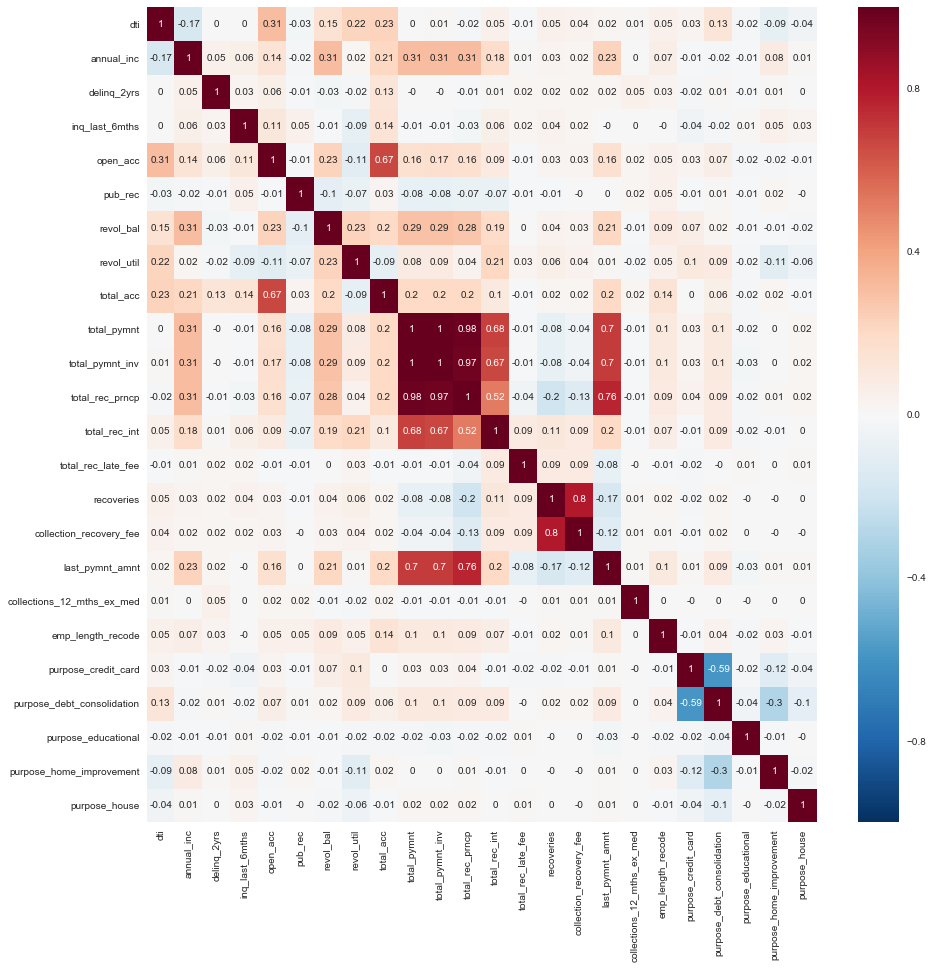

In [59]:
plt.figure(figsize=(15,15))
sns.heatmap(train.iloc[:,:25].drop('loan_status_charged_off', axis=1).corr().round(2), annot=True)
plt.show()

### Observations

Here we see inter-correlations between multiple variables, which will negatively affect the model if they are not handled. To this extent, correlated variables should be reduced to a single variable. The following variables contain correlations:

toal_acc ~ open_acc


total_pymnt_inv ~ total_pymnt ~ total_rec_prncp ~ total_rec_prncp ~ last_payment


recoveries ~ collection_recovery_fee

purpose_debt_consolidation ~ purpose_credit_card

## Visualizing Data with Violin Plot
The violin plot is an excellent way to quickly see the distribution of values for each response. 

(-3, 5.0)

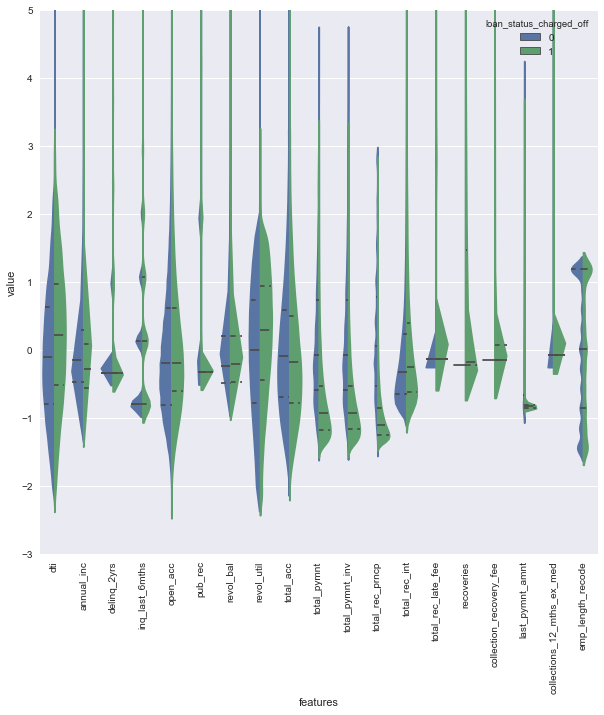

In [60]:
data_ls = train.loan_status_charged_off
data = train.iloc[:,:19]
data_n_2 = (data - data.mean()) / (data.std())

data = pd.concat([data_ls,data_n_2],axis=1)

data = pd.melt(data,id_vars="loan_status_charged_off",
                    var_name="features",
                    value_name='value')

plt.figure(figsize=(10,10))
sns.violinplot(x="features", y="value", hue="loan_status_charged_off", data=data,split=True, inner="quart")
plt.xticks(rotation=90)
plt.ylim(ymax=5)
plt.ylim(ymin=-3)

(-3, 5.0)

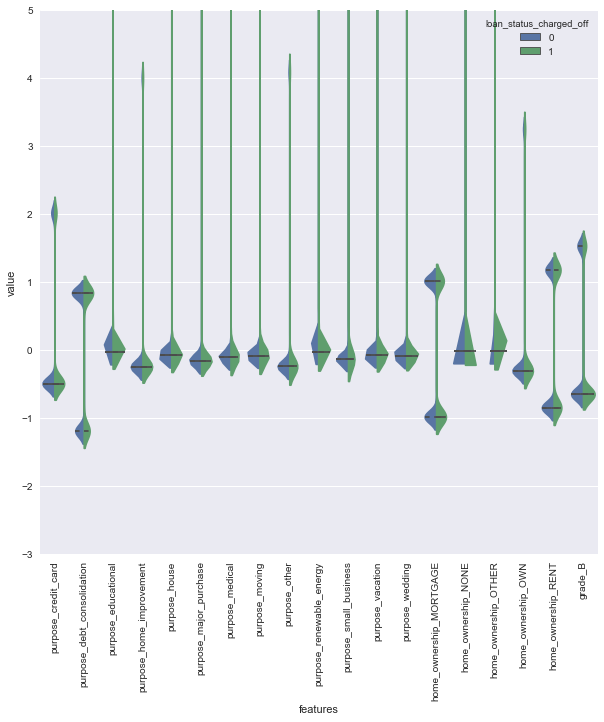

In [61]:
data_ls = train.loan_status_charged_off
data = train.iloc[:,20:39]
data_n_2 = (data - data.mean()) / (data.std())

data = pd.concat([data_ls,data_n_2],axis=1)

data = pd.melt(data,id_vars="loan_status_charged_off",
                    var_name="features",
                    value_name='value')

plt.figure(figsize=(10,10))
sns.violinplot(x="features", y="value", hue="loan_status_charged_off", data=data,split=True, inner="quart")
plt.xticks(rotation=90)
plt.ylim(ymax=5)
plt.ylim(ymin=-3)

(-3, 5.0)

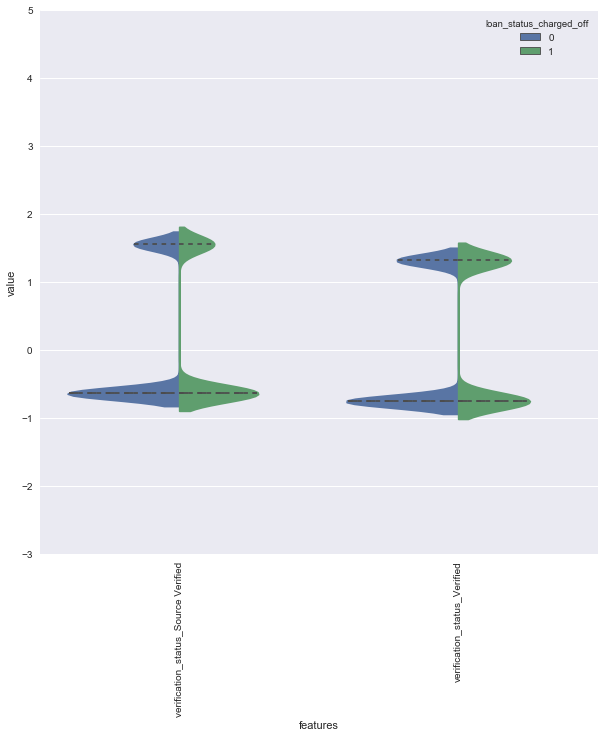

In [62]:
data_ls = train.loan_status_charged_off
data = train.iloc[:,95:]
data_n_2 = (data - data.mean()) / (data.std())

data = pd.concat([data_ls,data_n_2],axis=1)

data = pd.melt(data,id_vars="loan_status_charged_off",
                    var_name="features",
                    value_name='value')

plt.figure(figsize=(10,10))
sns.violinplot(x="features", y="value", hue="loan_status_charged_off", data=data,split=True, inner="quart")
plt.xticks(rotation=90)
plt.ylim(ymax=5)
plt.ylim(ymin=-3)

### Observations

One thing that I noticed are the plots for 'recoveries' and 'collection_recovery_fee', neither of which have values for those that were Fully Paid.

To further investigate this, I created a simple frequency distribution to validate what I see visually.

#### Looking at the table below, it's clear that there are no values for recoveries and collection_recovery_fee for users that are labeled as "Fully Paid". Having these variables in the model can significantly impact precision.

In [63]:
train.groupby("loan_status_charged_off")['recoveries','collection_recovery_fee'].sum().round(2)

,recoveries,collection_recovery_fee
loan_status_charged_off,,
0,0.00,0.0
1,28048921.56,2974879.4


#### Plotting the frequency counts of the target variable reveals an obvious class imbalance. Instead of resampling, I'll be using an AUC and Precision-Recall Curve to evaluate the models, the latter of which is robust to class imbalances.

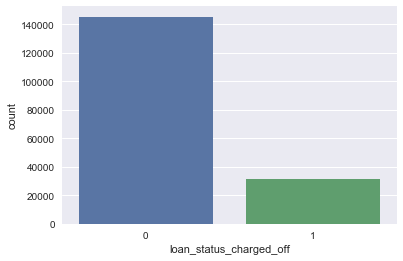

In [64]:
sns.countplot(data=train, x='loan_status_charged_off')

### Converting all variables to floats for modeling in sklearn

In [65]:
train2 = train.astype(float)
test2 = test.astype(float)

#### Defining a model function

Since we'll be testing at least 4 different classification models, I've created a basic function that standardizes the data, runs the model, and outputs a classification report, accuracy score, auc score, and average auc score for a 5-fold cross validation. The funciton also returns the false positvie rate, true positive rate, precision, and recall values for plotting.

In [66]:
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_predict, cross_val_score
from sklearn.metrics import precision_recall_curve

def modler(x_train, x_test, y_train, y_test, model):
    scaler = StandardScaler()
    
    x_train_scaled = scaler.fit_transform(x_train)
    x_test_scaled = scaler.transform(x_test)
    
    model.fit(x_train_scaled, y_train)
    
    prediction = model.predict(x_test_scaled)
    y_score = model.predict_proba(x_test_scaled)[:,1]
    
    accuracy = metrics.accuracy_score(prediction,y_test)
    auc_score = metrics.roc_auc_score(y_test,y_score)
   
    output = classification_report(y_test, prediction, target_names=['Charged Off', 'Fully Paid'])
    conf_matrix = pd.crosstab(y_test, prediction, rownames=['True'], colnames= ['Predicted'], margins=False)
    
    fpr, tpr, thresholds = metrics.roc_curve(y_test, y_score, drop_intermediate = False)
    
    precision, recall, _ = precision_recall_curve(y_test, y_score)
    
    cvs = cross_val_score(model, x_train_scaled, y_train, cv=5, scoring='roc_auc', n_jobs= -1).mean() 
    print ('Accuracy: ', metrics.accuracy_score(y_test, prediction),'\n')
    print('AUC: ', auc_score,'\n')
    print('AUC-Cross Validated Average: ', cvs,'\n')
    print('Classification Report: \n', output,"\n")
    print('Confusion Matrix \n',conf_matrix)
    
    return fpr, tpr, model, precision, recall

#### Testing the first model: Logistic Regression

In [67]:
x_train = train2.drop('loan_status_charged_off', axis=1)
x_test = test2.drop('loan_status_charged_off', axis=1)

y_train=train2.loan_status_charged_off
y_test= test2.loan_status_charged_off

model =LogisticRegression()
OG_LR = modler(x_train, x_test, y_train, y_test, model)

Accuracy:  0.978772466136 

AUC:  0.994095429188 

AUC-Cross Validated Average:  0.99418900145 

Classification Report: 
              precision    recall  f1-score   support

Charged Off       0.98      0.99      0.99     62323
 Fully Paid       0.95      0.93      0.94     13569

avg / total       0.98      0.98      0.98     75892
 

Confusion Matrix 
 Predicted    0.0    1.0
True                   
0.0        61695    628
1.0          983  12586


#### Accuracy is very high

It appears that at this point the model has very high accuracy. Let's see what happens when we remove some of the features that were discovered to be correlated

toal_acc ~ open_acc


total_pymnt_inv ~ total_pymnt ~ total_rec_prncp ~ total_rec_prncp ~ last_payment


recoveries ~ collection_recovery_fee

purpose_debt_consolidation ~ purpose_credit_card

In [68]:
removed = ['loan_status_charged_off', 'recoveries','total_rec_prncp',\
        'total_pymnt_inv','open_acc', 'total_rec_int','last_pymnt_amnt','purpose_debt_consolidation']

removed2 = ['loan_status_charged_off','recoveries','collection_recovery_fee']

In [69]:
x_train = train2.drop(removed, axis=1)
x_test = test2.drop(removed, axis=1)

y_train=train2.loan_status_charged_off
y_test= test2.loan_status_charged_off

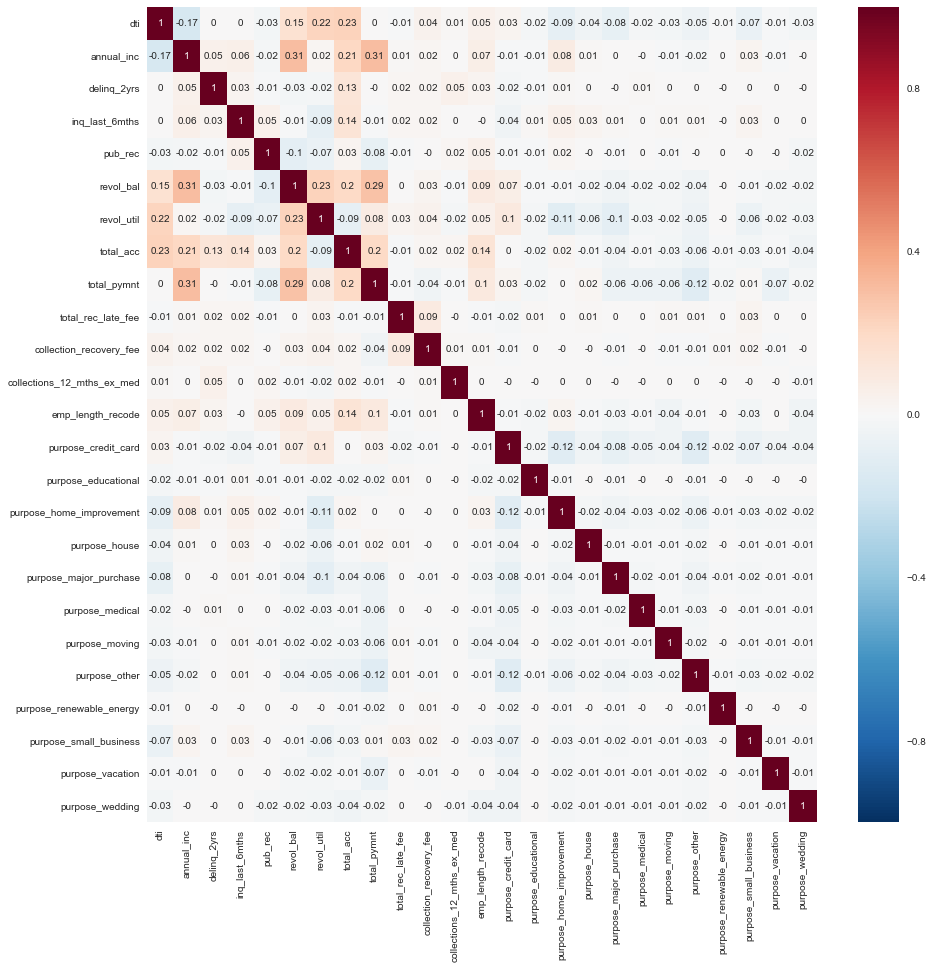

In [70]:
plt.figure(figsize=(15,15))
sns.heatmap(x_train.iloc[:,:25].corr().round(2), annot=True)
plt.show()

#### We now have independent predictors

#### By removing these variables, accuracy decreases. But more specifically, precision and recall for "Fully Paid" take a big hit. One reason for this may be a result of removing 'recoveries', which never occurs among records classified as "Fully Paid". It appears that the previous model may have learned to automatically classify any record containing a value in 'recoveries' other than 0 as "Charged Off".

In [71]:
model = LogisticRegression(random_state=1)

LR = modler(x_train, x_test, y_train, y_test, model)

Accuracy:  0.934854793654 

AUC:  0.952787082464 

AUC-Cross Validated Average:  0.952629461524 

Classification Report: 
              precision    recall  f1-score   support

Charged Off       0.94      0.99      0.96     62323
 Fully Paid       0.92      0.70      0.79     13569

avg / total       0.93      0.93      0.93     75892
 

Confusion Matrix 
 Predicted    0.0   1.0
True                  
0.0        61449   874
1.0         4070  9499


#### Let's see what happens when we add 'recoveries' and 'collection_recovery_fee' back into the model, but still remove all other correlated features

In [72]:
removed2 = ['loan_status_charged_off','total_rec_prncp',\
        'total_pymnt_inv','open_acc', 'total_rec_int','last_pymnt_amnt','purpose_debt_consolidation']

x_train2 = train2.drop(removed2, axis=1)
x_test2 = test2.drop(removed2, axis=1)

y_train2=train2.loan_status_charged_off
y_test2= test2.loan_status_charged_off

model = LogisticRegression(random_state=1)

rec_LR = modler(x_train2, x_test2, y_train2, y_test2, model)

Accuracy:  0.939848732409 

AUC:  0.956785347551 

AUC-Cross Validated Average:  0.95687489187 

Classification Report: 
              precision    recall  f1-score   support

Charged Off       0.94      0.99      0.96     62323
 Fully Paid       0.93      0.72      0.81     13569

avg / total       0.94      0.94      0.94     75892
 

Confusion Matrix 
 Predicted    0.0   1.0
True                  
0.0        61567   756
1.0         3809  9760


### Decision Tree Classifier
We are now going to run multiple other classifiers, starting with decision tree:

In [73]:
model = DecisionTreeClassifier(random_state=1)
 
DT = modler(x_train, x_test, y_train, y_test, model)

Accuracy:  0.914905391873 

AUC:  0.859203475164 

AUC-Cross Validated Average:  0.860010911765 

Classification Report: 
              precision    recall  f1-score   support

Charged Off       0.95      0.95      0.95     62323
 Fully Paid       0.76      0.77      0.76     13569

avg / total       0.92      0.91      0.92     75892
 

Confusion Matrix 
 Predicted    0.0    1.0
True                   
0.0        58952   3371
1.0         3087  10482


### Random Forest Classifier

In [74]:
model = RandomForestClassifier(n_estimators=500, min_samples_leaf=1, max_features= 'auto',random_state=1)

RF = modler(x_train, x_test, y_train, y_test, model)

Accuracy:  0.946529278448 

AUC:  0.958667764265 

AUC-Cross Validated Average:  0.95935464177 

Classification Report: 
              precision    recall  f1-score   support

Charged Off       0.95      0.99      0.97     62323
 Fully Paid       0.95      0.74      0.83     13569

avg / total       0.95      0.95      0.94     75892
 

Confusion Matrix 
 Predicted    0.0    1.0
True                   
0.0        61804    519
1.0         3539  10030


### Basic MLP Neural Network

In [1]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from sklearn.preprocessing import MinMaxScaler as mms

Using TensorFlow backend.


In [32]:
normalization = mms(feature_range = (0,1))
X_train = normalization.fit_transform(x_train)
X_test = normalization.transform(x_test)

model = Sequential()
model.add(Dense(500, input_dim=X_train.shape[1], activation = 'relu'))
model.add(Dense(200, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 500)               45000     
_________________________________________________________________
dense_2 (Dense)              (None, 200)               100200    
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 201       
Total params: 145,401
Trainable params: 145,401
Non-trainable params: 0
_________________________________________________________________
None


#### The following is a function that plots the accuracy and error on the validation set. This will help us to refine the model by observing at what epoch the two lines begin to diverge

In [33]:
def show_train_history(train_history, train, val):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[val])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train','val'], loc='best')
    plt.show()

#### Because the neural network requires different parameters than the other ML algorithms used, I've had to re-configure the previous function to make is suitable for a neural network

In [34]:
def nn_modler(X_train, X_test, y_train, y_test, model, epochs_=50):
    
    model_fit = model.fit(X_train, y_train, validation_split=0.2,  epochs=epochs_, verbose = 1, batch_size= X_train.shape[0])
    
    prediction = model.predict_classes(X_test)
    y_score= model.predict_proba(X_test)

 
    accuracy = metrics.accuracy_score(prediction,y_test)
    auc_score = metrics.roc_auc_score(y_test,y_score)
   
    output = classification_report(y_test, np.ravel(prediction), target_names=['Charged Off', 'Fully Paid'])
    conf_matrix = pd.crosstab(y_test, prediction[:,0], rownames=['True'], colnames= ['Predicted'], margins=False)
    
    fpr, tpr, thresholds = metrics.roc_curve(y_test, y_score, drop_intermediate = False, pos_label = 1)
    
    precision, recall, _ = precision_recall_curve(y_test, y_score)
    
    show_train_history(model_fit,'acc','val_acc')
    show_train_history(model_fit,'loss','val_loss')
    

    print ('Accuracy: ', metrics.accuracy_score(y_test, prediction),'\n')
    print('AUC: ', auc_score,'\n')

    print('Classification Report: \n', output,"\n")
    print('Confusion Matrix \n',conf_matrix)
    
    return fpr, tpr, model, precision, recall

### Neural Network with 500 epochs

As can be seen in the chart, the NN begins to diverge around the 100th epoch, suggesting that this is where overfitting starts to occur.

Train on 141663 samples, validate on 35416 samples
Epoch 1/500
141663/141663 [==============================] - 2s - loss: 0.6557 - acc: 0.8094 - val_loss: 0.5856 - val_acc: 0.8234
Epoch 2/500
141663/141663 [==============================] - 2s - loss: 0.5868 - acc: 0.8205 - val_loss: 0.5326 - val_acc: 0.8234
Epoch 3/500
141663/141663 [==============================] - 2s - loss: 0.5346 - acc: 0.8205 - val_loss: 0.4955 - val_acc: 0.8234
Epoch 4/500
141663/141663 [==============================] - 2s - loss: 0.4983 - acc: 0.8205 - val_loss: 0.4746 - val_acc: 0.8234
Epoch 5/500
141663/141663 [==============================] - 2s - loss: 0.4782 - acc: 0.8205 - val_loss: 0.4683 - val_acc: 0.8234
Epoch 6/500
141663/141663 [==============================] - 2s - loss: 0.4729 - acc: 0.8205 - val_loss: 0.4717 - val_acc: 0.8234
Epoch 7/500
141663/141663 [==============================] - 2s - loss: 0.4770 - acc: 0.8205 - val_loss: 0.4770 - val_acc: 0.8234
Epoch 8/500
141663/141663 [============

141663/141663 [==============================] - 2s - loss: 0.2570 - acc: 0.9015 - val_loss: 0.2666 - val_acc: 0.8991
Epoch 126/500
141663/141663 [==============================] - 2s - loss: 0.2566 - acc: 0.9016 - val_loss: 0.2664 - val_acc: 0.8991
Epoch 127/500
141663/141663 [==============================] - 2s - loss: 0.2562 - acc: 0.9018 - val_loss: 0.2661 - val_acc: 0.8993
Epoch 128/500
141663/141663 [==============================] - 2s - loss: 0.2558 - acc: 0.9021 - val_loss: 0.2659 - val_acc: 0.8991
Epoch 129/500
141663/141663 [==============================] - 2s - loss: 0.2555 - acc: 0.9019 - val_loss: 0.2657 - val_acc: 0.8995
Epoch 130/500
141663/141663 [==============================] - 2s - loss: 0.2551 - acc: 0.9025 - val_loss: 0.2654 - val_acc: 0.8987
Epoch 131/500
141663/141663 [==============================] - 2s - loss: 0.2548 - acc: 0.9018 - val_loss: 0.2653 - val_acc: 0.8996
Epoch 132/500
141663/141663 [==============================] - 2s - loss: 0.2545 - acc: 0.

141663/141663 [==============================] - 2s - loss: 0.2239 - acc: 0.9163 - val_loss: 0.2494 - val_acc: 0.9041
Epoch 250/500
141663/141663 [==============================] - 2s - loss: 0.2234 - acc: 0.9148 - val_loss: 0.2490 - val_acc: 0.9045
Epoch 251/500
141663/141663 [==============================] - 2s - loss: 0.2229 - acc: 0.9165 - val_loss: 0.2488 - val_acc: 0.9047
Epoch 252/500
141663/141663 [==============================] - 2s - loss: 0.2226 - acc: 0.9159 - val_loss: 0.2487 - val_acc: 0.9047
Epoch 253/500
141663/141663 [==============================] - 2s - loss: 0.2223 - acc: 0.9163 - val_loss: 0.2487 - val_acc: 0.9044
Epoch 254/500
141663/141663 [==============================] - 2s - loss: 0.2222 - acc: 0.9165 - val_loss: 0.2488 - val_acc: 0.9044
Epoch 255/500
141663/141663 [==============================] - 2s - loss: 0.2221 - acc: 0.9158 - val_loss: 0.2488 - val_acc: 0.9042
Epoch 256/500
141663/141663 [==============================] - 2s - loss: 0.2221 - acc: 0.

141663/141663 [==============================] - 2s - loss: 0.2011 - acc: 0.9245 - val_loss: 0.2427 - val_acc: 0.9067
Epoch 374/500
141663/141663 [==============================] - 2s - loss: 0.2012 - acc: 0.9253 - val_loss: 0.2430 - val_acc: 0.9065
Epoch 375/500
141663/141663 [==============================] - 2s - loss: 0.2014 - acc: 0.9238 - val_loss: 0.2434 - val_acc: 0.9065
Epoch 376/500
141663/141663 [==============================] - 2s - loss: 0.2016 - acc: 0.9252 - val_loss: 0.2440 - val_acc: 0.9057
Epoch 377/500
141663/141663 [==============================] - 2s - loss: 0.2021 - acc: 0.9227 - val_loss: 0.2444 - val_acc: 0.9057
Epoch 378/500
141663/141663 [==============================] - 2s - loss: 0.2024 - acc: 0.9251 - val_loss: 0.2451 - val_acc: 0.9048
Epoch 379/500
141663/141663 [==============================] - 2s - loss: 0.2030 - acc: 0.9216 - val_loss: 0.2447 - val_acc: 0.9055
Epoch 380/500
141663/141663 [==============================] - 2s - loss: 0.2025 - acc: 0.

141663/141663 [==============================] - 2s - loss: 0.1853 - acc: 0.9304 - val_loss: 0.2412 - val_acc: 0.9081
Epoch 498/500
141663/141663 [==============================] - 2s - loss: 0.1855 - acc: 0.9311 - val_loss: 0.2414 - val_acc: 0.9084
Epoch 499/500
141663/141663 [==============================] - 2s - loss: 0.1856 - acc: 0.9298 - val_loss: 0.2413 - val_acc: 0.9081
Epoch 500/500
75360/75892 [============================>.] - ETA: 0s

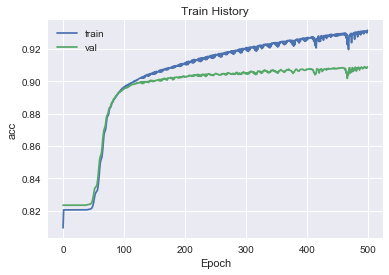

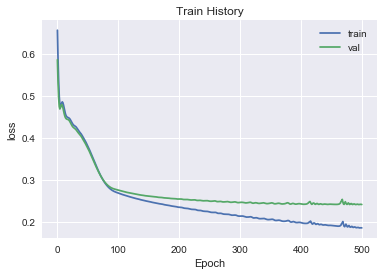

Accuracy:  0.907671427818 

AUC:  0.925031680581 

Classification Report: 
              precision    recall  f1-score   support

Charged Off       0.92      0.97      0.95     62323
 Fully Paid       0.82      0.62      0.71     13569

avg / total       0.90      0.91      0.90     75892
 

Confusion Matrix 
 Predicted      0     1
True                  
0.0        60477  1846
1.0         5161  8408


In [35]:
 NN = nn_modler(X_train, X_test, y_train, y_test, model, epochs_=500) 

### Neural Network with 100 epochs
Trained a second NN with 100 epochs to see if the AUC would increase, however, it did not positively affect performance on the test set, so I will continue forth with the first NN running at 500 epochs.

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 500)               45000     
_________________________________________________________________
dense_14 (Dense)             (None, 200)               100200    
_________________________________________________________________
dense_15 (Dense)             (None, 1)                 201       
Total params: 145,401
Trainable params: 145,401
Non-trainable params: 0
_________________________________________________________________
None
Train on 141663 samples, validate on 35416 samples
Epoch 1/100
141663/141663 [==============================] - 2s - loss: 0.6445 - acc: 0.8189 - val_loss: 0.5713 - val_acc: 0.8234
Epoch 2/100
141663/141663 [==============================] - 2s - loss: 0.5728 - acc: 0.8205 - val_loss: 0.5264 - val_acc: 0.8234
Epoch 3/100
141663/141663 [==============================] - 2s - loss: 0.5288 - acc

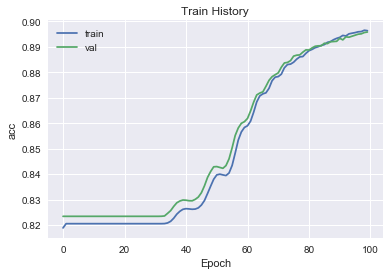

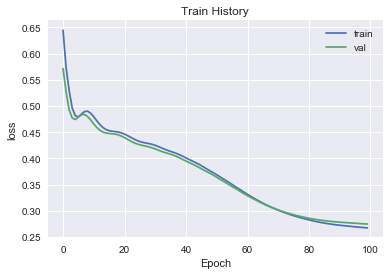

Accuracy:  0.8929926738 

AUC:  0.903652023657 

Classification Report: 
              precision    recall  f1-score   support

Charged Off       0.91      0.97      0.94     62323
 Fully Paid       0.78      0.56      0.65     13569

avg / total       0.89      0.89      0.89     75892
 

Confusion Matrix 
 Predicted      0     1
True                  
0.0        60189  2134
1.0         5987  7582


In [77]:
normalization = mms(feature_range = (0,1))
X_train = normalization.fit_transform(x_train)
X_test = normalization.transform(x_test)

model = Sequential()
model.add(Dense(500, input_dim=X_train.shape[1], activation = 'relu'))
model.add(Dense(200, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

print(model.summary())

NN_100 = nn_modler(X_train, X_test, y_train, y_test, model, epochs_=100) 

### Which model is the best?

To evaluate model accuracy, we'll be looking at two measures the area under the curve (AUC) and the precision-recall curve (PR Curve). We use AUC in place of standard accuracy due to the imbalance of classes, which could lead the model to simply classify everything as the majority class and still predict better than chance (e.g. 50%). AUC is a more robust measure than standard accuracy as it considers correct vs incorrect predictions through the assessment of the true positive and false positive rates.

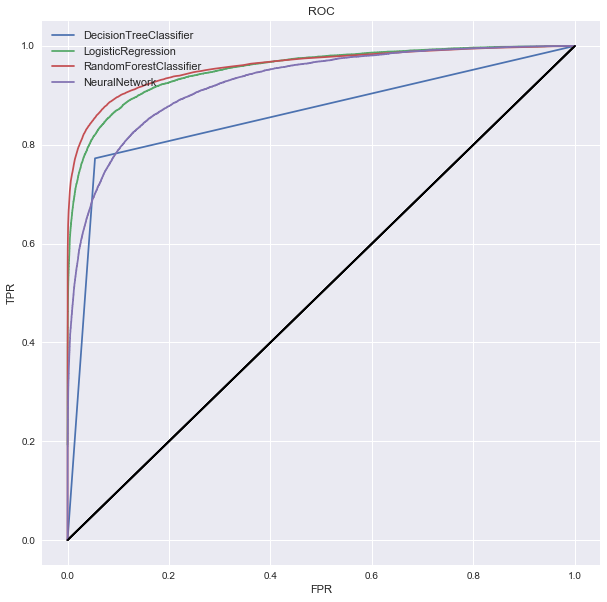

In [78]:
algos = {}
algos['DecisionTreeClassifier']=DT
algos['LogisticRegression']=LR
algos['RandomForestClassifier']=RF
algos['NeuralNetwork']=NN
for k,v in algos.items():
    plt.figure(1, figsize=(10,10))
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.title('ROC')
    plt.plot(v[0], v[1], label = k)
    plt.legend(loc=2, prop={'size':11})
    plt.plot([0,1],[0,1], color = 'black')

Due to the fact that our classes are imbalanced, we need to make sure that our model is able to classify true positive records of the minority class (High precision) but still correctly classifying records on the majority class and not just classifying everything as "Charged off" (low recall). Based on the PR Curve, the results are pretty much identical.

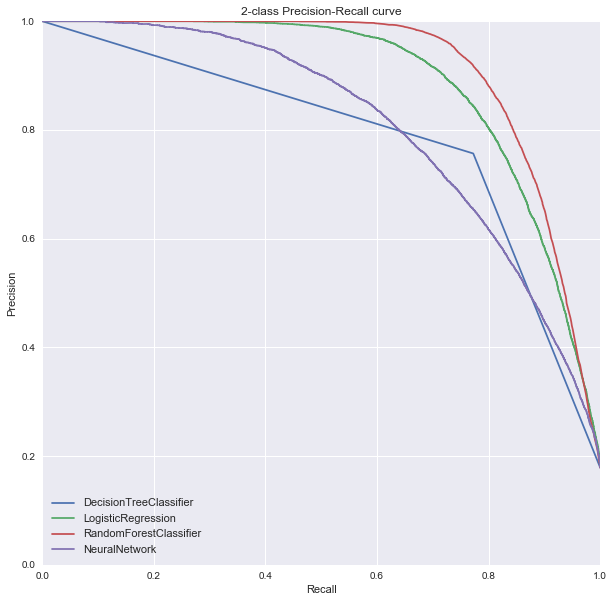

In [79]:
for k,v in algos.items():
    plt.figure(1, figsize=(10,10))
    plt.plot(v[4], v[3], label = k)
    
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.0])
    plt.xlim([0.0, 1.0])
    plt.title('2-class Precision-Recall curve')
    
    plt.legend(loc=3, prop={'size':11})

# Random Forest
Random Forest yielded the best AUC and PR-Curve results and would be my choice to use for further development.